# Recommender Systems
### Reverse-engeneering users needs/desires

Recommender systems have been in the heart of ML. Mostly that in order to get insigths on large populations it was necessary to understand how users behave, but this can only be done from the historical behaviour. 

Let's fix some setting that we use for the workshop. We have three main components: the business, the users, and the products. Most of the time a business would like to recommend products to its users. The business knows that the better it understands the user, the better the recommendations, and thus the user will be more likely to consume its products.

Simple right? Well, not as much, the following things need to be considered:

- What does it mean to know a user? How can we encode this? 
- If we have the purchase history of the user, do we want to recommend new items or old items? Why?
- Business rules exists, like inventory, push products, maximize revenue, lower churn, etc.
- What policies should be put in place? GDPR? 
- How to reduce bias.
- Computational resources, speed.
- Cold start for products and users.
- Legacy systems.
- UX integration.
- etc


Historically, two main approaches exist: collaborative filtering and content-based recommendations. These are often used together.

# Collaborative Filtering


## Memory based

 - Easy to explain
 - Hard to scale
 - Not good for sparse data

Usually based on similarity. 




## Model based

 - Good for sparse
 - Difficult to explain
 - Hard to do inference


Let's start with the most basic approach using a popular
(light-weight) dataset [MovieLens](http://files.grouplens.org/datasets/movielens/ml-20m.zip)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load MovieLens Data

In [2]:
data_dir = "../data/ml-20m"

os.listdir(data_dir)

['movies.csv', 'ratings.csv']

In [3]:
movies = pd.read_csv(f"{data_dir}/movies.csv")
ratings = pd.read_csv(f"{data_dir}/ratings.csv")

## Exploring the data 

Use pandas to understand the distribution of your data, this helps understand what kind of goals are possible. It is always a good idea to extensively explore and understand the data.

### Exercise:
1. Choose a couple from the following list and use pandas to find out the answer:

    - What columns exist in the data?
    - What are the possible rankings?
    - How are the rankings distributed? 
    - What is the average ranking? 
    - What is the distribution of the average ranking among users?
    - How many genres are there?
    - What is the genre distribution for the movies?
    - What can you say about the timestamp? 
    - Do all movies have a year? What is the distribution of Mystery movies during the years?

2. Come up with at least two more statistics that aren't from the above list.

*Use the following couple of cells to answer your questions. Make sure to work on this before moving ahead.*

##### Possible rankings (rating)

In [4]:
np.sort(ratings['rating'].unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

##### Average ranking (rating)

In [5]:
round(ratings['rating'].mean(),1)

3.5

##### Do all movies have a year?

In [6]:
import re

In [7]:
# make copy of movies
df_movies = movies.copy()
# Since year seems to be captured as part of the title, in parentheses, let's capture all instances within parentheses 
# and get the last element of the list -- candidate to year
df_movies['year'] = df_movies['title'].apply(lambda x: re.findall('\((.*?)\)', x)[-1:])
# account for cases where list can be empty
df_movies['year'] = df_movies['year'].apply(lambda x: x[0].strip() if x != [] else np.nan)

In [8]:
df_movies.sample(20)

,movieId,title,genres,year
16638,84158,Craig's Wife (1936),Drama,1936
20392,100087,Night of the Demons 2 (1994),Horror,1994
16191,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,2010
9211,27147,"4th Floor, The (1999)",Thriller,1999
26314,126395,The Woodcarver (2012),Drama,2012
4659,4755,Wish Upon a Star (1996),Comedy,1996
17093,86539,White Lightnin' (2009),Drama,2009
6986,7098,Seven Days to Noon (1950),Drama|Thriller,1950
10468,38320,Valerie and Her Week of Wonders (Valerie a týd...,Adventure|Drama|Fantasy,1970
23562,112185,"Outlaw, The (Lope) (2010)",Drama,2010


Anomalies in terms of how year is provided (on-going, range)

In [9]:
df_movies['year'][22368].split('-')

['2009–']

In [10]:
df_movies['year'][22679].split('-')

['1975', '1979']

In [11]:
df_movies['year'][17341]

'Bicicleta, cullera, poma'

In [12]:
df_movies['year'][17341].isnumeric()

False

Fixing these instances

In [13]:
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [14]:
df_movies['year'][10593]

nan

In [15]:
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001


In [16]:
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001


In [17]:
def get_year(list_years: list) -> int:
    if ((len(list_years) == 1)):
        return int(list_years[0].replace('–',''))
    else:
        return int(np.mean([int(x) for x in list_years]))
        

##### How many generes?

In [18]:
df_movies = df_movies.copy()

In [19]:
df_movies['list_genres'] = df_movies['genres'].apply(lambda x: list(set(x.split('|'))))
df_movies['num_genres'] = df_movies.apply(lambda x: 0 if x['genres'] == "(no genres listed)" else len(x['list_genres']), axis = 1)

In [20]:
df_movies[df_movies['genres'] != "(no genres listed)"]

,movieId,title,genres,year,list_genres,num_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Fantasy, Children]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Drama, Comedy, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy],1
...,...,...,...,...,...,...
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,2001,"[Comedy, Horror]",2
27273,131254,Kein Bund für's Leben (2007),Comedy,2007,[Comedy],1
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,[Comedy],1
27275,131258,The Pirates (2014),Adventure,2014,[Adventure],1


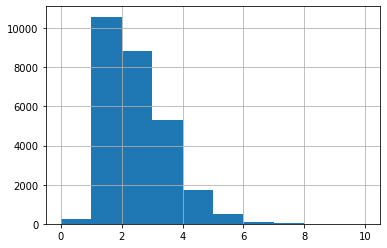

In [21]:
df_movies['num_genres'].hist()
plt.show()

In [22]:
np.sort(df_movies['num_genres'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10], dtype=int64)

In [23]:
unique_genres = np.sort(df_movies[(df_movies['num_genres'] == 1)]['genres'].unique())
num_unique_genres = len(unique_genres)


print(num_unique_genres)
print(unique_genres)

19
['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [24]:
df_movies[df_movies['num_genres'] == 10]['list_genres'][16024]

['Adventure',
 'Western',
 'Action',
 'Thriller',
 'Drama',
 'Film-Noir',
 'Mystery',
 'Crime',
 'Comedy',
 'Horror']

#### What is the distribution of Mystery movies during the years?

In [25]:
df_movies.head(6)

,movieId,title,genres,year,list_genres,num_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Fantasy, Children]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Drama, Comedy, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy],1
5,6,Heat (1995),Action|Crime|Thriller,1995,"[Action, Thriller, Crime]",3


In [26]:
df_movies['mystery_movie'] = df_movies['list_genres'].apply(lambda x: 'Mystery' in x)

In [27]:
df_movies[df_movies['mystery_movie']].sort_values(by=['year'])

,movieId,title,genres,year,list_genres,num_genres,mystery_movie
18305,91503,Blind Justice (Hævnens nat) (1916),Drama|Mystery|Thriller,1916,"[Drama, Mystery, Thriller]",3,True
18163,90907,Eerie Tales (Unheimliche Geschichten) (1919),Fantasy|Horror|Mystery,1919,"[Fantasy, Mystery, Horror]",3,True
16097,81435,"Haunted Castle, The (Schloß Vogeloed) (1921)",Crime|Drama|Horror|Mystery,1921,"[Drama, Mystery, Horror, Crime]",4,True
4672,4768,"Dr. Mabuse: The Gambler (Dr. Mabuse, der Spiel...",Crime|Mystery|Thriller,1922,"[Mystery, Thriller, Crime]",3,True
8346,25745,"Man from Beyond, The (1922)",Mystery,1922,[Mystery],1,True
...,...,...,...,...,...,...,...
25786,122147,Beck - Familjen (2015),Crime|Mystery|Thriller,2015,"[Mystery, Thriller, Crime]",3,True
26573,127311,The Forbidden Room (2015),Comedy|Drama|Mystery|Romance,2015,"[Drama, Comedy, Mystery, Romance]",4,True
27045,129937,Run All Night (2015),Action|Crime|Drama|Mystery|Thriller,2015,"[Action, Thriller, Drama, Mystery, Crime]",5,True
25495,120757,Beck - Rum 302 (2015),Crime|Mystery|Thriller,2015,"[Mystery, Thriller, Crime]",3,True


In [28]:
def plot_distribution_year(data_frame: pd.DataFrame, initial_year_str: str, end_year_str: str, min_num_genres: int = 1):
    """
    Function that displays plot bar for number of movies between two given years and a min number of generes
    args:
         data_frame - dataframe associated with mystery movies
         initial_year_str - string capturing initial year that will be captured for bar plot
         end_year_str - string capturing end year that will be captured for bar plot
         min_num_genres - integer representing minumin number of generes to capture in the analysis
    returns:
            it displays barplot 
    """
    data_frame[ data_frame['mystery_movie'] & (data_frame['year'] >= initial_year_str) & (data_frame['year'] <= end_year_str) & (data_frame['num_genres'] >= min_num_genres)].rename(columns={'movieId':'number_movies'})[['year','number_movies']].groupby('year').count().plot.bar()
    plt.show()
    

In [29]:
df_movies

,movieId,title,genres,year,list_genres,num_genres,mystery_movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Fantasy, Children]",3,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]",2,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Drama, Comedy, Romance]",3,False
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy],1,False
...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007,[Comedy],1,False
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,[Comedy],1,False
27275,131258,The Pirates (2014),Adventure,2014,[Adventure],1,False
27276,131260,Rentun Ruusu (2001),(no genres listed),2001,[(no genres listed)],0,False


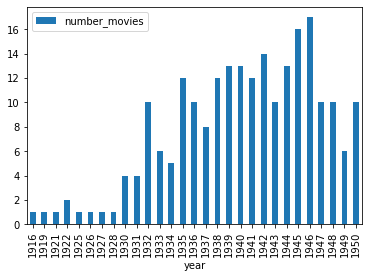

In [30]:
plot_distribution_year(df_movies,'1910','1950')

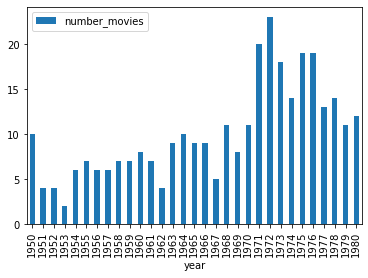

In [31]:
plot_distribution_year(df_movies,'1950','1980')

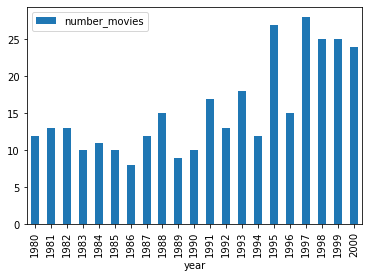

In [32]:
plot_distribution_year(df_movies,'1980','2000')

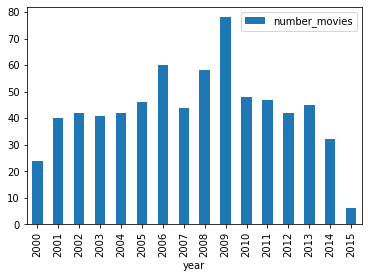

In [33]:
plot_distribution_year(df_movies,'2000','2020')

#### Distribution of movies with five or more generes during the years

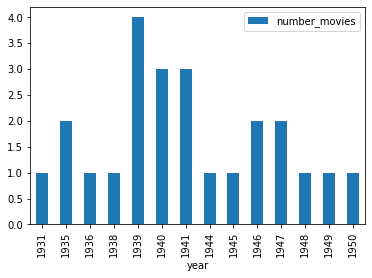

In [34]:
plot_distribution_year(df_movies,'1910','1950', min_num_genres=5)

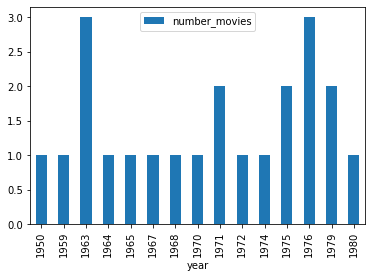

In [35]:
plot_distribution_year(df_movies,'1950','1980', min_num_genres=5)

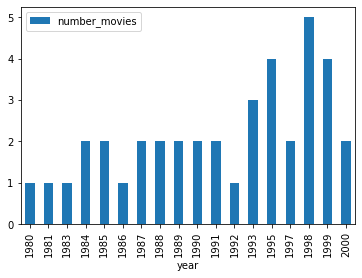

In [36]:
plot_distribution_year(df_movies,'1980','2000', min_num_genres=5)

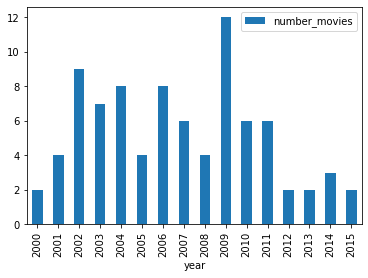

In [37]:
plot_distribution_year(df_movies,'2000','2020', min_num_genres=5)

In [38]:
# Rough initial work..

#df['year'] = df['title'].apply(lambda x: x[-6:].replace('(','').replace(')','').strip())
#df['year'] = df['title'].apply(lambda x: x[x.find("(")+1:x.find(")")])

#df['year'] = df['title'].apply(lambda x: re.findall('\(.*?\)', x))

## Work of facilitators continue

In [39]:
# What columns exist in the data?
print(f"The movies dataset has columns: {movies.columns.values}")
print(f"The ratings dataset has columns: {ratings.columns.values}")

The movies dataset has columns: ['movieId' 'title' 'genres']
The ratings dataset has columns: ['userId' 'movieId' 'rating' 'timestamp']


In [40]:
# What are the possible rankings?
sorted(ratings.rating.unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

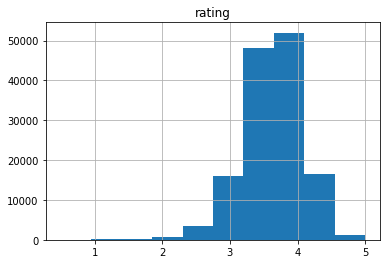

In [41]:
# How are the rankings distributed?
ratings[['userId', 'rating']].groupby('userId').mean().hist()
plt.show()

In [42]:
# What is the average ranking? 
print(f"The average rating is {round(ratings.rating.mean(), 2)}")

The average rating is 3.53


Note that the data is quite simple, we only have some info about the movies, which takes the form 

In [43]:
movies.sample(1)

,movieId,title,genres
6969,7081,I'm No Angel (1933),Comedy


In [44]:
ratings.sample(1)

,userId,movieId,rating,timestamp
18605930,128773,235,4.0,913981225


Even though the information about the movies could help us create better recommenders, we won't be using it. Instead we only focus on the ratings dataframe. We can count the relevant users and movies from this:

In [45]:
ratings.nunique()

userId         138493
movieId         26744
rating             10
timestamp    15351121
dtype: int64

~ 139K users and ~27K movies, rated in a 10 point scale. We can also plot two important pieces of information:
- The histogram of how many ratings each movie has.
- The histogram of how many ratings each user gives.

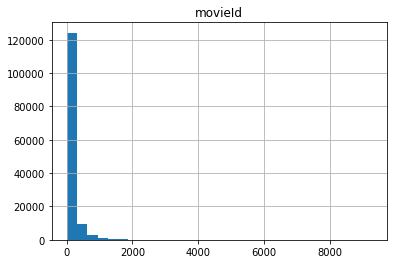

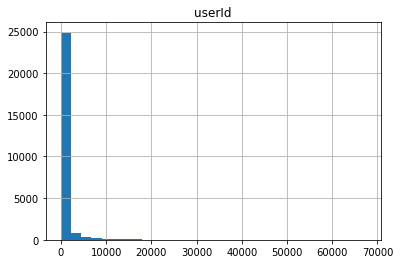

In [46]:
ratings.groupby("userId").agg({"movieId":len}).hist(bins=30)
ratings.groupby("movieId").agg({"userId":len}).hist(bins=30)
plt.show()

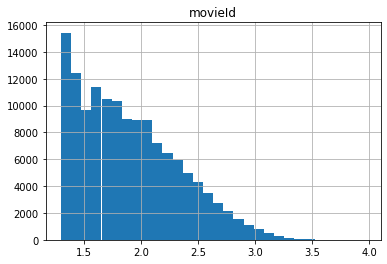

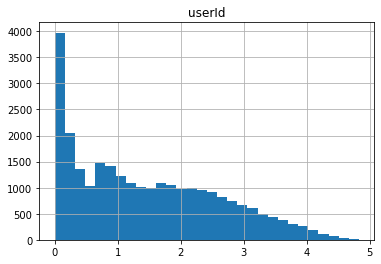

In [47]:
np.log10(ratings.groupby("userId").agg({"movieId":len})).hist(bins=30)
np.log10(ratings.groupby("movieId").agg({"userId":len})).hist(bins=30)
plt.show()

The distribution (note the log) shows that most movies are rated by a handfull of users, and that most users don't rate many movies. Furthermore, note that a user x movie matrix should contain 756 million entries, but there are only 20 million ratings. this is only ~2.6 % of non-zero entries. That is we are in a sparse situation (which is not as bad in this case as it is in some other settings)

### Exercise:
1. According to the info above, for which movies/users is easier to make recommendations? Find at least one user or movie that you suspect is troublesome.
2. The dataframe encodes part of the user-item rating matrix. Suppose that you want to write this matrix, what is the size in GB of this matrix? 

##### Question #1

In [48]:
movies.shape

(27278, 3)

In [49]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [50]:
ratings.shape

(20000263, 4)

In [51]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [52]:
df_usr_ratings = ratings.groupby("userId").agg({"movieId":len}).rename(columns={'movieId':'number_rates'}).sort_values(by = ['number_rates'])


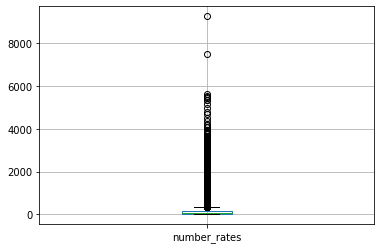

In [53]:
df_usr_ratings.boxplot()
plt.show()

In [54]:
df_usr_ratings.head(10)

,number_rates
userId,
39574,20
61692,20
20578,20
68139,20
21882,20
41288,20
120164,20
68123,20
50578,20


In [55]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [56]:
df_mv_ratings = ratings.groupby("movieId").agg({"userId":len}).rename(columns={'userId':'number_rates'}).sort_values(by = ['number_rates'])


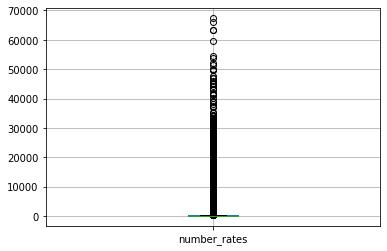

In [57]:
df_mv_ratings.boxplot()
plt.show()

In [58]:
df_mv_ratings.head(10)

,number_rates
movieId,
131262,1
84436,1
84442,1
84500,1
84534,1
110167,1
110163,1
84538,1
110140,1


In [59]:
movies[movies['movieId'].isin(df_mv_ratings.head(10).index)] 

,movieId,title,genres
16690,84436,Less is More (Menos es más) (2000),Comedy
16691,84442,Dark Forces (Harlequin) (1980),Drama|Fantasy|Mystery
16710,84500,Seventh Horse of the Sun (Suraj Ka Satvan Gho...,Drama|Romance
16721,84534,Kolberg (1945),Drama|War
16722,84538,"Suspended Vocation, The (La vocation suspendue...",Drama
16723,84540,"Hole in the Soul, A (Rupa u dusi) (1994)",Comedy|Documentary
23100,110140,Takedown: The DNA of GSP (2014),Documentary
23103,110163,Aujourd'hui (2012),Drama
23104,110167,"Judge and the Assassin, The (Juge et l'assassi...",Crime|Drama
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


##### Question #2

In [60]:
from scipy.sparse import csr_matrix

def get_usr_item_mtrx(data_frame: pd.DataFrame) -> csr_matrix:
    """
    Function that creates user-item sparse matrix (matrix constructed from regular numpy arrays) from ratings dataframe

    Args:
        data_frame: ratings dataframe - it contain at least columns [userId, movieId, rating]

    Returns:
        usr_itm_mtrx: user-item sparse matrix
    """
    
    # get number rows and columns
    n_rows = data_frame['userId'].nunique()
    n_cols = data_frame['movieId'].nunique()
    
    # dictionary mapping user Ids to user indices
    user_mapper = dict(zip(np.unique(data_frame['userId']), list(range(n_rows))))
    # dictionary mapping movie Ids to movie indices
    movie_mapper = dict(zip(np.unique(data_frame['movieId']), list(range(n_cols))))
    
    # get lists of user and items indices
    user_index = [user_mapper[i] for i in data_frame['userId']]
    item_index = [movie_mapper[i] for i in data_frame['movieId']]

    usr_itm_mtrx = csr_matrix((data_frame['rating'], (user_index,item_index)), shape=(n_rows, n_cols))

    return usr_itm_mtrx



In [61]:
usr_itm_mtrx = get_usr_item_mtrx(ratings[['userId', 'movieId', 'rating']])

In [62]:
usr_itm_mtrx.shape

(138493, 26744)

In [63]:
usr_itm_mtrx.size

20000263

In [64]:
# bytes of array elements
usr_itm_mtrx.data.nbytes

160002104

In [69]:
# MB of array elements
int(usr_itm_mtrx.data.nbytes*1e-6)

160

In [66]:
# bytes of all arrays needed to build sparse matrix
usr_itm_mtrx.data.nbytes + usr_itm_mtrx.indptr.nbytes + usr_itm_mtrx.indices.nbytes

240557132

In [71]:
# MBs of all arrays needed to build sparse matrix
int((usr_itm_mtrx.data.nbytes + usr_itm_mtrx.indptr.nbytes + usr_itm_mtrx.indices.nbytes)*1e-6)

240